In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import scipy.stats as stats


with open('data/velo-historical.json', 'r') as f:
    json_data = json.load(f)

# Extract the 'stats' key from the JSON structure
data = json_data['stats']

# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(data, columns=['timestamp', 'price'])

# Convert the unix timestamps to pandas datetime format
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Sort the dataframe by the date index if needed
df.sort_index(inplace=True)

# Calculate daily returns using the 'price' column
df['daily_return'] = df['price'].pct_change()

# Optional: remove any NaN values (first row will have NaN due to pct_change)
df.dropna(subset=['daily_return'], inplace=True)

# Display the resulting DataFrame with daily returns
print(df[['price', 'daily_return']])
    

                            price  daily_return
date                                           
2022-06-03 00:00:00.000  0.041636      0.000000
2022-06-04 00:00:00.000  0.044944      0.079444
2022-06-05 00:00:00.000  0.039845     -0.113462
2022-06-06 00:00:00.000  0.036546     -0.082779
2022-06-07 00:00:00.000  0.036659      0.003094
...                           ...           ...
2024-10-19 00:00:00.000  0.094410      0.003546
2024-10-20 00:00:00.000  0.093220     -0.012607
2024-10-21 00:00:00.000  0.095700      0.026610
2024-10-22 00:00:00.000  0.091043     -0.048666
2024-10-22 02:22:26.804  0.090025     -0.011184

[874 rows x 2 columns]


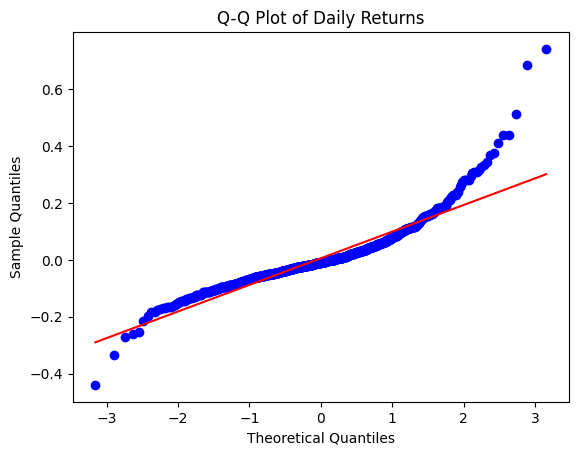

In [2]:
# Assuming the previous code to load data and calculate daily returns is already executed
# df contains the daily returns in 'daily_return' column

# Create a Q-Q plot for the daily returns
stats.probplot(df['daily_return'], dist="norm", plot=plt)

# Add labels and a title
plt.title('Q-Q Plot of Daily Returns')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Display the plot
plt.show()

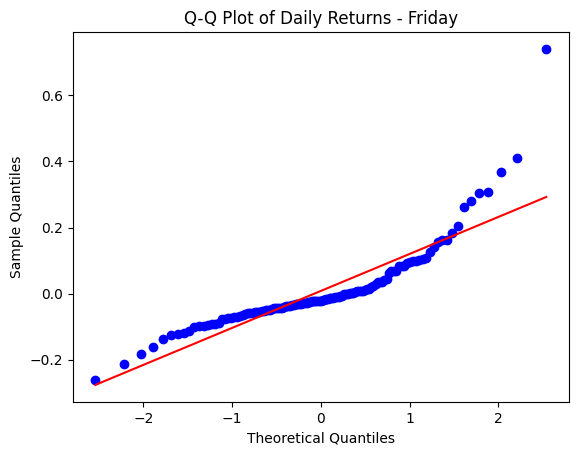

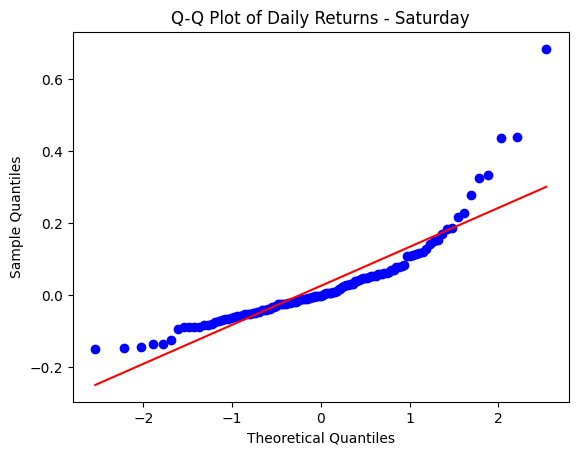

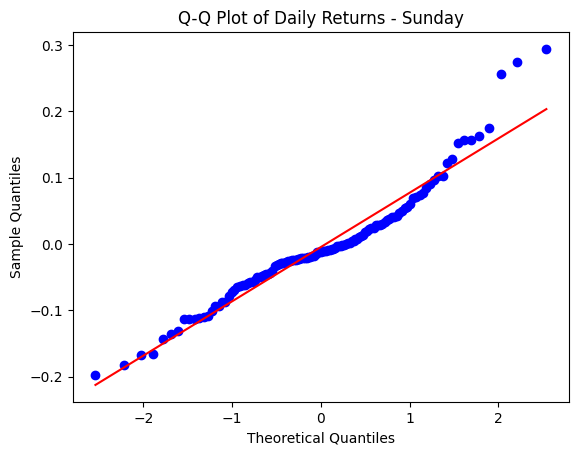

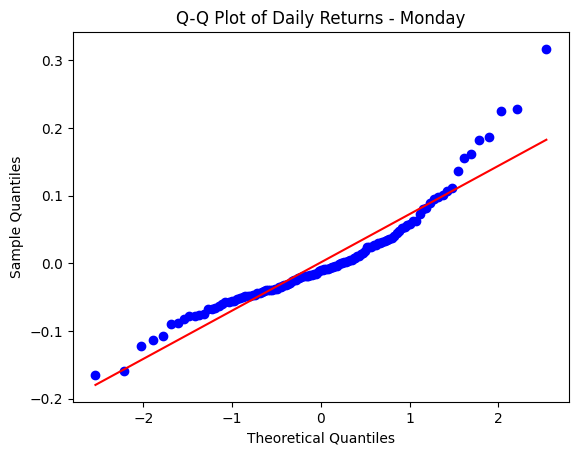

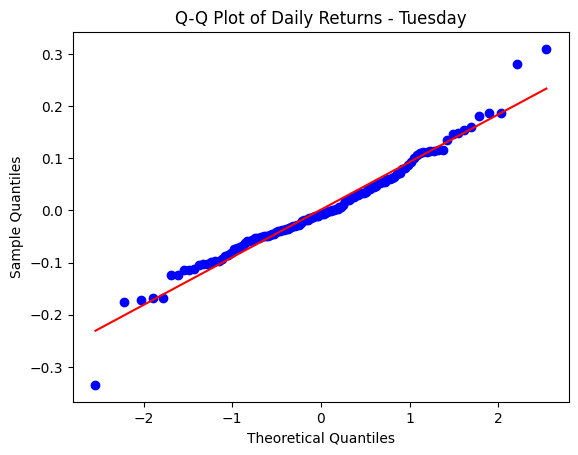

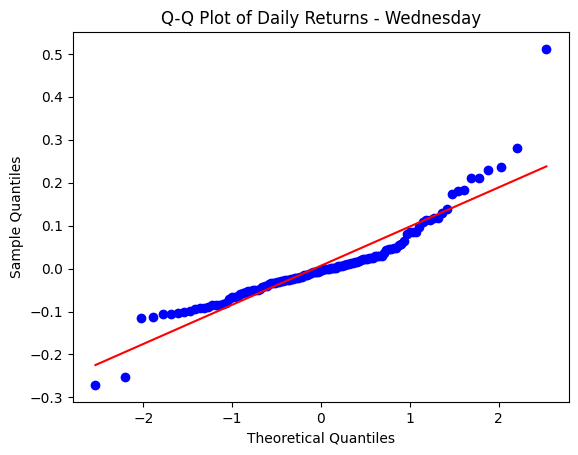

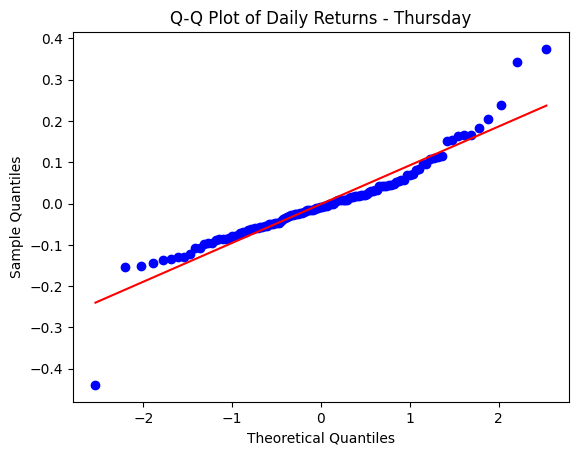

In [3]:
df['day_of_week'] = df.index.dayofweek

# Map day_of_week to actual day names (optional, for clarity)
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_map)

# Generate Q-Q plots for each day of the week
for day in df['day_name'].unique():
    day_data = df[df['day_name'] == day]['daily_return'].dropna()
    
    plt.figure()
    stats.probplot(day_data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Daily Returns - {day}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    
    # Show the plot for each day
    plt.show()

/tmp/ipykernel_363370/4169837046.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=days)


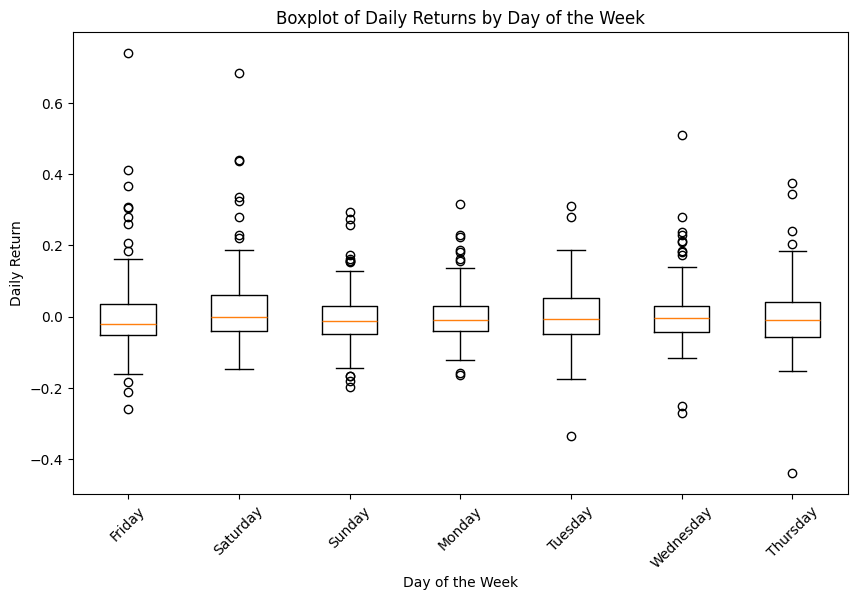

In [4]:
# Assuming df is already defined with 'daily_return' and 'day_name' columns
# Group the data by day of the week
days = df['day_name'].unique()
data = [df[df['day_name'] == day]['daily_return'].dropna() for day in days]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=days)

# Add labels and title
plt.title('Boxplot of Daily Returns by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Daily Return')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()
